# Step 4.  Average number of people per household will be assessed with using of additional file with Ireland Administrative regions classification:

•	Average number of people per household per counties and country for 2011, 2016, 2022

It will be 2 parts:
    
    1. data cleaning for data frame with Ireland's regions classification. This data frame will be used in the future for cases where data are collected per county and/or city instead of region.
    
    2. data exploring, cleaning, processing, visualising for data frame with Average Number of Persons per Private Household.

In [5]:
#IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading file with Ireland's regions classification and displaing it
df_reg = pd.read_csv("Regions.csv")
df_reg

,Name of region,Constituent counties,Type of area
0,Border,Cavan,Administrative county
1,NaN,Donegal,Administrative county
2,NaN,Leitrim,Administrative county
3,NaN,Louth,Administrative county
4,NaN,Monaghan,Administrative county
5,NaN,Sligo,Administrative county
6,NaN,NaN,NaN
7,Dublin,Dublin,City
8,NaN,Dún Laoghaire-Rathdown,Administrative county
9,NaN,Fingal,Administrative county


In [7]:
#Using 'ffill' method in the column with Regions to fill NAs with the last valid value 
df_reg["Name of region "] = df_reg["Name of region "].fillna(method='ffill')
df_reg.sample(8)

,Name of region,Constituent counties,Type of area
34,South-West,Cork,City
2,Border,Leitrim,Administrative county
5,Border,Sligo,Administrative county
30,South-East,Waterford,City
21,Mid-West,Clare,Administrative county
15,Mid-East,NaN,NaN
33,South-East,NaN,NaN
4,Border,Monaghan,Administrative county


In [8]:
# dropping rows with empty values
df_reg = df_reg.dropna()

In [9]:
# North Tiperrary and South Tiperrary contain additional space at the end, so removing it
df_reg["Constituent counties"] = df_reg["Constituent counties"].str.replace(f'Tipperary ', 'Tipperary')

In [10]:
#checking is every row from "Constituent counties" has according value in "Name of region"
df_reg

,Name of region,Constituent counties,Type of area
0,Border,Cavan,Administrative county
1,Border,Donegal,Administrative county
2,Border,Leitrim,Administrative county
3,Border,Louth,Administrative county
4,Border,Monaghan,Administrative county
5,Border,Sligo,Administrative county
7,Dublin,Dublin,City
8,Dublin,Dún Laoghaire-Rathdown,Administrative county
9,Dublin,Fingal,Administrative county
10,Dublin,South Dublin,Administrative county


# Average Number of Persons per Private Household - EDA

main goal: to have Average Number of Persons per Private Household for each year from range 2011 - 2022

### Part 1 - Aggregating values from 42 counties/cities into 9 regions

In [11]:
# Loading file with Average Number of Persons per Private Household and displaing it
df_avg = pd.read_csv("F2002.csv")
df_avg.head()

,Statistic Label,CensusYear,County,UNIT,VALUE
0,Average Number of Persons per Private Househol...,1971,Co. Clare,Number,3.81
1,Average Number of Persons per Private Househol...,1971,Co. Cork,Number,3.93
2,Average Number of Persons per Private Househol...,1971,Co. Cavan,Number,3.64
3,Average Number of Persons per Private Househol...,1971,Co. Carlow,Number,4.17
4,Average Number of Persons per Private Househol...,1971,Co. Donegal,Number,3.90


In [12]:
# first, I will check values in "County" and replace them with according region name
df_avg.County.unique()

array(['Co. Clare', 'Co. Cork', 'Co. Cavan', 'Co. Carlow', 'Co. Donegal',
       'Co. Dublin', 'Co. Galway', 'Co. Kildare', 'Co. Kilkenny',
       'Co. Kerry', 'Co. Longford', 'Co. Louth', 'Co. Limerick',
       'Co. Leitrim', 'Co. Laois', 'Co. Meath', 'Co. Monaghan',
       'Co. Mayo', 'Co. Offaly', 'Co. Roscommon', 'Co. Sligo',
       'Co. Tipperary', 'Co. Waterford', 'Co. Wicklow', 'Co. Westmeath',
       'Co. Wexford', 'Ireland'], dtype=object)

In [13]:
#Removing symbols "." and "Co" for future easier processing
df_avg['County'] = df_avg['County'].str.replace('.', '')
df_avg['County'] = df_avg['County'].str.replace('Co ', '')
df_avg.County.unique()

array(['Clare', 'Cork', 'Cavan', 'Carlow', 'Donegal', 'Dublin', 'Galway',
       'Kildare', 'Kilkenny', 'Kerry', 'Longford', 'Louth', 'Limerick',
       'Leitrim', 'Laois', 'Meath', 'Monaghan', 'Mayo', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Wicklow',
       'Westmeath', 'Wexford', 'Ireland'], dtype=object)

In [14]:

#Function "create_region_column" is working with 2 dataframes as arguments:
#for eah element from column "County" in the "df" will check if there is according name in "Constituent counties" column
#from "df_reg" and if so value from column "Name of region" will be taken for new "Name of Region" column

#As a result we will have new column "Region" with an according region value for each county/city

def create_region_column(df, df_reg):
    df['Name of Region'] = df['County'].apply(
        lambda x: df_reg.loc[df_reg['Constituent counties'] == x, 'Name of region '].iloc[0] 
        if x in df_reg['Constituent counties'].to_list() else x)
    return df

In [15]:
#applying fuction to current dataframe and checking if new column is created with correct values
df_avg = create_region_column(df_avg, df_reg)

#I will use ".sample" method as it gives list of random values and in this case will be more informative
df_avg.sample(10)

,Statistic Label,CensusYear,County,UNIT,VALUE,Name of Region
29,Average Number of Persons per Private Househol...,1981,Cavan,Number,3.52,Border
194,Average Number of Persons per Private Househol...,2022,Dublin,Number,2.73,Dublin
138,Average Number of Persons per Private Househol...,2011,Carlow,Number,2.79,South-East
151,Average Number of Persons per Private Househol...,2011,Monaghan,Number,2.85,Border
211,Average Number of Persons per Private Househol...,2022,Waterford,Number,2.62,South-East
22,Average Number of Persons per Private Househol...,1971,Waterford,Number,3.91,South-East
196,Average Number of Persons per Private Househol...,2022,Kildare,Number,2.98,Mid-East
208,Average Number of Persons per Private Househol...,2022,Roscommon,Number,2.66,West
206,Average Number of Persons per Private Househol...,2022,Mayo,Number,2.59,West
214,Average Number of Persons per Private Househol...,2022,Wexford,Number,2.72,South-East


In [16]:
# reagganging columns: replacing "County" with  'Name of Region'
df_avg = pd.DataFrame(df_avg,columns=['Statistic Label','CensusYear', 'Name of Region','UNIT','VALUE'])
df_avg.head()

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
0,Average Number of Persons per Private Househol...,1971,Mid-West,Number,3.81
1,Average Number of Persons per Private Househol...,1971,South-West,Number,3.93
2,Average Number of Persons per Private Househol...,1971,Border,Number,3.64
3,Average Number of Persons per Private Househol...,1971,South-East,Number,4.17
4,Average Number of Persons per Private Househol...,1971,Border,Number,3.90


In [17]:
# Checking 'Name of Region' for unique values to make sure that there is only regions
df_avg["Name of Region"].unique()

array(['Mid-West', 'South-West', 'Border', 'South-East', 'Dublin', 'West',
       'Mid-East', 'Midlands', 'Ireland'], dtype=object)

In [18]:
# checking null values
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  216 non-null    object 
 1   CensusYear       216 non-null    int64  
 2   Name of Region   216 non-null    object 
 3   UNIT             216 non-null    object 
 4   VALUE            216 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ KB


In [19]:
# Group the DataFrame by the 'Statistic Label', 'CensusYear', 'Name of Region', and 'UNIT' columns
df_grouped = df_avg.groupby(['Statistic Label','CensusYear', 'Name of Region','UNIT'])

# Calculate the mean of the 'VALUE' column for each group
df_agg = df_grouped['VALUE'].mean()

In [20]:
df_agg.head()

Statistic Label                                                             CensusYear  Name of Region  UNIT  
Average Number of Persons per Private Household in Permanent Housing Units  1971        Border          Number    3.726667
                                                                                        Dublin          Number    3.940000
                                                                                        Ireland         Number    3.940000
                                                                                        Mid-East        Number    4.126667
                                                                                        Mid-West        Number    3.923333
Name: VALUE, dtype: float64

In [21]:
#resetting the indexes after aggregation
df_agg = df_agg.reset_index()
df_agg.head()

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
0,Average Number of Persons per Private Househol...,1971,Border,Number,3.726667
1,Average Number of Persons per Private Househol...,1971,Dublin,Number,3.940000
2,Average Number of Persons per Private Househol...,1971,Ireland,Number,3.940000
3,Average Number of Persons per Private Househol...,1971,Mid-East,Number,4.126667
4,Average Number of Persons per Private Househol...,1971,Mid-West,Number,3.923333


### Part 2 - Exploring the data

In [22]:
# verifying available years
df_agg.CensusYear.unique()

array([1971, 1981, 1991, 2002, 2006, 2011, 2016, 2022], dtype=int64)

**Observation**

relevant range for the project is 2011- 2022, and there are gaps between the data in this range.

##### Let's visualise the dynamics for each region on how average number of persons was changing in time
in order to have clear view let's plot a separate view for each of the region and arrange them in 2 columns

In [27]:
unique_region_names = df_agg['Name of Region'].unique()

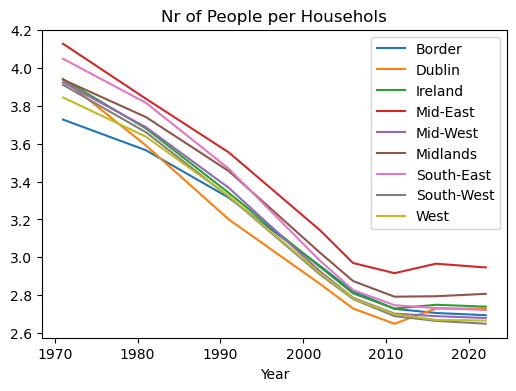

In [38]:
#Visualising resulting data frame. 
# Plotting all regions on same graph identify trend
plt.figure(figsize=(6, 4))
for region in unique_region_names:
    df_region = df_agg[df_agg['Name of Region'] == region]
    plt.plot(df_region['CensusYear'], df_region['VALUE'], label=region)
    plt.title('Nr of People per Househols')
    plt.legend(loc='upper right')
    plt.xlabel("Year")

**Observation**
Ranges from 2011 to 2016 and from 2016 to 2022 have linear dependency and values for them are very close.
This mean that we can filer values for 2011, 2016 and 2022 and check their mean and standard deviation.  

In [40]:
#Filtering years
df_agg = df_agg.drop(df_agg[(df_agg["CensusYear"] != 2011) & (df_agg["CensusYear"] != 2016) &
                            (df_agg["CensusYear"] != 2022)].index)

In [41]:
# checking unique values to be sure that filter is applied
df_agg.CensusYear.unique()

array([2011, 2016, 2022], dtype=int64)

In [42]:
#checking mean and standard deviation
df_agg.describe()

,CensusYear,VALUE
count,27.000000,27.000000
mean,2016.333333,2.740833
std,4.582576,0.083977
min,2011.000000,2.650000
25%,2011.000000,2.690000
50%,2016.000000,2.728333
75%,2022.000000,2.748750
max,2022.000000,2.966667


**Observation**

Having linear consistent dependency and low standard deviation (0.08) we can use interpolation method in order to fill missing values

# Interpolating NAs

##### step 1 :
Create rows with missing calues. I.e. 

years to interpolate = [2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021]

for list of regions: ['Mid-West', 'South-West', 'Border', 'South-East', 'Dublin', 'West', 'Mid-East', 'Midlands', 'Ireland']

In [43]:
# Create a set to store the unique names of the regions
region_names = set()

# Iterate over the data frame and add each region name to the set
for region in df_agg['Name of Region']:
    region_names.add(region)

# Convert the set to a list
unique_region_names = list(region_names)

In [44]:
#checking the list
unique_region_names

['South-West',
 'Mid-East',
 'Border',
 'West',
 'Ireland',
 'Dublin',
 'Mid-West',
 'Midlands',
 'South-East']

In [45]:
#checking current years
df_agg.CensusYear.unique()

array([2011, 2016, 2022], dtype=int64)

In [46]:
# checking nr of rows and columns
df_agg.shape

(27, 5)

In [47]:
years_to_interpolate = [2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021]

# Create a list of lists, where each sublist contains the values for a single row in the new data frame
data = []
for year in years_to_interpolate:
    for region in unique_region_names:
        row = [np.nan, year, region, np.nan, np.nan]
        data.append(row)

In [48]:
# creating a data frame for each year and region with empty values for other columns
df = pd.DataFrame(data, columns=['Statistic Label', 'CensusYear', 'Name of Region', 'UNIT', 'VALUE'])

In [49]:
df.head()

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
0,NaN,2012,South-West,NaN,NaN
1,NaN,2012,Mid-East,NaN,NaN
2,NaN,2012,Border,NaN,NaN
3,NaN,2012,West,NaN,NaN
4,NaN,2012,Ireland,NaN,NaN


##### Step 2:
combining created data frame with existing one, sorting rows by years and interpolating missing values 

In [50]:
# combining created data frame with existing one
df_agg = pd.concat([df_agg, df], ignore_index=True)

In [51]:
# checking min year and max year to make sure that concatination was successful
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  27 non-null     object 
 1   CensusYear       108 non-null    int64  
 2   Name of Region   108 non-null    object 
 3   UNIT             27 non-null     object 
 4   VALUE            27 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ KB


In [52]:
# dropping columns 'Statistic Label' and 'UNIT', as they will be excessive
df_agg = df_agg.drop(['Statistic Label', 'UNIT'], axis=1)

In [53]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_agg = df_agg.sort_values(by=['CensusYear',"Name of Region"], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_agg = df_agg.reset_index(drop=True)

In [54]:
# Group the DataFrame by region
grouped_dataframe = df_agg.groupby("Name of Region")

# Interpolate the missing values in each region
interpolated_dataframe = grouped_dataframe.apply(lambda group: group.interpolate(method="linear", axis=0))

# Ungroup the DataFrame
interpolated_dataframe = interpolated_dataframe.reset_index(drop=True)


In [55]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_agg = interpolated_dataframe.sort_values(by=['CensusYear'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_agg = df_agg.reset_index(drop=True)

In [56]:
# Verifying null values
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CensusYear      108 non-null    int64  
 1   Name of Region  108 non-null    object 
 2   VALUE           108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [57]:
# checking random values
df_agg.sample(10)

,CensusYear,Name of Region,VALUE
34,2014,Dublin,2.698000
18,2013,Mid-West,2.698000
85,2020,Dublin,2.730000
1,2011,Midlands,2.792500
48,2016,South-East,2.732500
89,2020,South-East,2.725833
51,2016,Ireland,2.750000
79,2019,Mid-West,2.685000
52,2016,Border,2.706667
95,2021,Midlands,2.805417


In [58]:
# rounding numbers up to 3 decimal point
df_agg['VALUE'] = df_agg['VALUE'].apply(lambda x: '{:.3f}'.format(x))
df_agg['VALUE'] = df_agg['VALUE'].astype(float)

In [59]:
# creating new view to the data frame for easier reading and use in the future calculations
df_agg = df_agg.rename(columns={'VALUE': 'Average Nr of Persons Household','CensusYear': 'Year','Name of Region': 'Region'})

In [60]:
# checkinh new view
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             108 non-null    int64  
 1   Region                           108 non-null    object 
 2   Average Nr of Persons Household  108 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


##### Step 3: Visualising resulting data frame

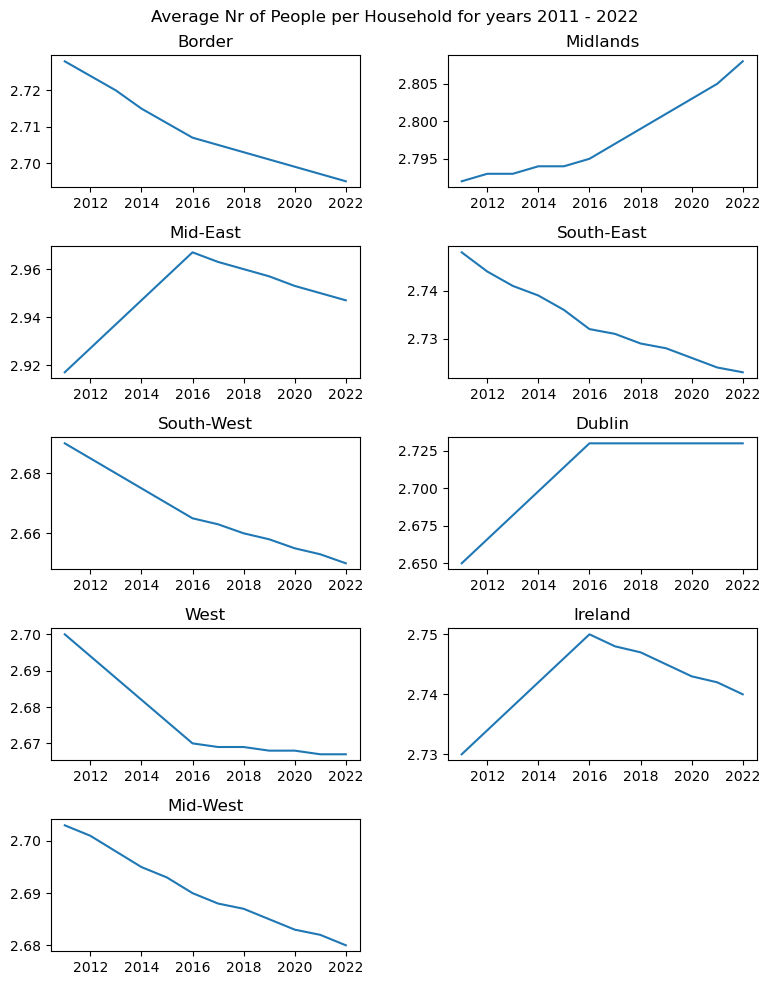

In [66]:
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)
# Create a figure
fig = plt.figure(figsize=(8, 10))
fig.suptitle("Average Nr of People per Household for years 2011 - 2022")
# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_agg['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_agg['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_agg[df_agg['Region'] == region]
    # Plot the graph for the current region
    ax.plot(df_region['Year'], round(df_region['Average Nr of Persons Household'],3), label=region)
    ax.set_title(f'{region}')
    
# Adjust the layout of the figure
fig.tight_layout()
# Show the plot
plt.show()

**Observation**

Not all of the graphs are smooth, however this will not create big bias on other data.

In [86]:
df_agg.to_csv("F2002_c.csv", index = False)